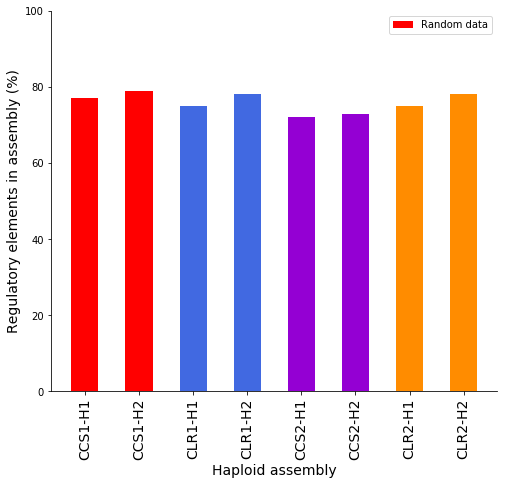

In [57]:
import os
import csv

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

example_input = """
color   0       HG00733_hgsvc_pbsq2-ccs_1000-pereg.h1-un.racon-p2.fasta
color   1       HG00733_hgsvc_pbsq2-ccs_1000-pereg.h2-un.racon-p2.fasta
color   2       HG00733_hgsvc_pbsq2-clr_1000-flye.h1-un.arrow-p1.fasta.gz
color   3       HG00733_hgsvc_pbsq2-clr_1000-flye.h2-un.arrow-p1.fasta.gz
color   4       GRCh38_GCA_p13.fasta
combination     0       3737794
combination     1       3667243
combination     0-1     3515806
combination     2       5693544
combination     0-2     20314778
combination     1-2     13604151
combination     0-1-2   1050448
combination     3       5636580
combination     0-3     13150030
combination     1-3     20309123
combination     0-1-3   1062494
combination     2-3     1156953
combination     0-2-3   400564
combination     1-2-3   360610
combination     0-1-2-3 44167114
combination     4       64007417
combination     0-4     2072432
combination     1-4     1837417
combination     0-1-4   4405337
combination     2-4     577616
combination     0-2-4   20237886
combination     1-2-4   13352385
combination     0-1-2-4 3925612
combination     3-4     576772
combination     0-3-4   13556184
combination     1-3-4   20028204
combination     0-1-3-4 3920872
combination     2-3-4   2488165
combination     0-2-3-4 3222207
combination     1-2-3-4 3321549
combination     0-1-2-3-4       2347915986
"""

colors = ['red', 'royalblue', 'darkviolet', 'darkorange', 'olivedrab', 'darkgrey']

color_to_assm = {
    '0': 'CCS-H1',
    '1': 'CCS-H2',
    '2': 'CLR-H1',
    '3': 'CLR-H2',
    '4': 'hg38'
}

comb_counts = dict()

for idx, item in enumerate(example_input.strip().split('\n')):
    parts = [p for p in item.split() if p.strip()]
    if parts[0] == 'color':
        continue
    if parts[0] == 'combination':
        comb = parts[1]
        count = int(parts[2])
        key = [color_to_assm[k] for k in comb.split('-')]
        comb_counts[tuple(key)] = count
        
plot_combinations = [
    '0-1-2-3-4',
    '4',
    '0-1-2-3',
    '0-1',
    '2-3',
    '0-2',
    '0-3',
    '1-2',
    '1-3'
]

plot_combs = []
for p in plot_combinations:
    key = [color_to_assm[k] for k in p.split('-')]
    plot_combs.append(tuple(key))

               
def plot_kmer_statistic(counts, plot_combs):
    
    bar_heights = []
    bar_labels = []
    x_pos = []
    for idx, p in enumerate(plot_combs, start=1):
        l = ','.join(p)
        if idx == 1:
            bar_labels.append('CCS,CLR,hg38')
        elif idx == 3:
            bar_labels.append('CCS,CLR')
        else:
            bar_labels.append(l)
        bar_heights.append(counts[p])
        x_pos.append(idx)
    
    
    
#     color_idx = 0   
#     sample_names = []
#     tagging_values = np.zeros((3, len(sample_stats)), dtype=np.float32)
#     for col_idx, (sample, stats) in enumerate(sample_stats):
#         tagging_values[0, col_idx] = stats['hap1']
#         tagging_values[1, col_idx] = stats['hap2']
#         tagging_values[2, col_idx] = stats['untagged']
        
#         sample_names.append(sample)

#    x_labels = sample_names
#     bar_width = 0.4
    
#     fig, axis = plt.subplots(figsize=(8,7))
    
#     plot_label = 'Unique 31-mers in HG00733\nand hg38 assemblies'
    
#     axis.bar(x_pos, bar_heights, align='center',
#              yerr=None, label=plot_label, color='lightgrey')
#     axis.set_xlabel('Selected assemblies', fontsize=14)
#     axis.set_xticks(x_pos)
#     axis.set_xticklabels(bar_labels, rotation=90, fontsize=14, va='bottom')
#     axis.tick_params(axis="x",direction="in", pad=-15)
#     axis.set_ylabel('Count', fontsize=14)
#     axis.set_yscale('log')
#     axis.spines['top'].set_visible(False)
#     axis.spines['right'].set_visible(False)
#     axis.legend()
    
    bar_width = 0.5
    
    fig, axis = plt.subplots(figsize=(8,7))
    
    plot_label = 'Random data'
    
    bar_labels = [
        'CCS1-H1', 'CCS1-H2',
        'CLR1-H1', 'CLR1-H2',
        'CCS2-H1', 'CCS2-H2',
        'CLR2-H1', 'CLR2-H2'
    ]
    
    x_pos = list(range(1,9))
    bar_heights = [77, 79, 75, 78, 72, 73, 75, 78]
    bar_colors = [
        'red', 'red',
        'royalblue', 'royalblue',
        'darkviolet', 'darkviolet',
        'darkorange', 'darkorange'
    ]
    
    axis.bar(x_pos, bar_heights, align='center', width=bar_width,
             yerr=None, label=plot_label, color=bar_colors)
    axis.set_xlabel('Haploid assembly', fontsize=14)
    axis.set_xticks(x_pos)
    axis.set_ylim(0, 100)
    axis.set_xticklabels(bar_labels, rotation=90, fontsize=14)
    #axis.tick_params(axis="x",direction="in", pad=-15)
    axis.set_ylabel('Regulatory elements in assembly (%)', fontsize=14)
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.legend()

    return fig


fig = plot_kmer_statistic(comb_counts, plot_combs)

out_path = '/home/peter/Pictures/hgsvc/rand_kmer_stats.png'
os.makedirs(os.path.dirname(out_path), exist_ok=True)
fig.savefig(out_path, dpi=600, bbox_inches='tight')
        
    